This notebook demonstrates the use of **K-Prototypes** clustering to segment mall customers based on both **numerical** and **categorical** features.

- Traditional algorithms like KMeans only work with numeric data
- K-Prototypes is designed to handle **mixed-type data** (e.g., age + gender)


**What is K-Prototypes?**

K-Prototypes combines:
- **KMeans** : for numerical features (e.g., income, age)
- **KModes** : for categorical features (e.g., gender)

It uses:
- **Euclidean distance** for numeric data
- **Categorical dissimilarity** (0 for match, 1 for mismatch)
- A **weight factor (`gamma`)** to balance both parts


In [2]:
import pandas as pd
from kmodes.kprototypes import KPrototypes


**Dataset**

- Source: `Mall_Customers.csv`
- Features used:
  - `Gender` (categorical)
  - `Age` (numeric)
  - `Annual Income (k$)` (numeric)
  - `Spending Score (1-100)` (numeric)

In [4]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df_selected = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

**Preprocessing**

1. Loaded selected features
2. Ensured `Gender` is string format
3. Converted DataFrame to NumPy array (required by `kmodes` library)

In [ ]:
data_matrix = df_selected.copy()
data_matrix['Gender'] = data_matrix['Gender'].astype(str)
data_matrix_np = data_matrix.to_numpy()

**K-Prototypes Clustering**

- Library: `kmodes.kprototypes`
- Clustering performed using:
  ```pyhton
  kproto = KPrototypes(n_clusters=4, init='Cao', random_state=42)
  clusters = kproto.fit_predict(data_matrix_np, categorical=[0])

In [11]:
kproto = KPrototypes(n_clusters=4, init='Cao', verbose=1, random_state=42)

# Categorical column index → 0 ('Gender')
clusters = kproto.fit_predict(data_matrix_np, categorical=[0])

# Assign cluster labels to original DataFrame
df['KPrototypes_Cluster'] = clusters

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 48, ncost: 142098.9399189604
Run: 1, iteration: 2/100, moves: 59, ncost: 110815.90237935839
Run: 1, iteration: 3/100, moves: 20, ncost: 106679.74436780927
Run: 1, iteration: 4/100, moves: 2, ncost: 106522.0234403432
Run: 1, iteration: 5/100, moves: 3, ncost: 106342.18892832621
Run: 1, iteration: 6/100, moves: 0, ncost: 106342.18892832621
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 42, ncost: 149367.21827789585
Run: 2, iteration: 2/100, moves: 19, ncost: 138236.20627057538
Run: 2, iteration: 3/100, moves: 16, ncost: 126583.41283961161
Run: 2, iteration: 4/100, moves: 13, ncost: 113847.81369042202
Run: 2, iteration: 5/100, moves: 17, ncost: 106948.95968239669
Run: 2, iteration: 6/100, moves: 9, ncost: 106360.91226165951
Run: 2, iterat

Cluster labels were added to the original DataFrame as KPrototypes_Cluster

In [12]:
df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'KPrototypes_Cluster']].head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KPrototypes_Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


**Visualization**
A 2D scatter plot was used:

X-axis: Annual Income

Y-axis: Spending Score

Color: Cluster label

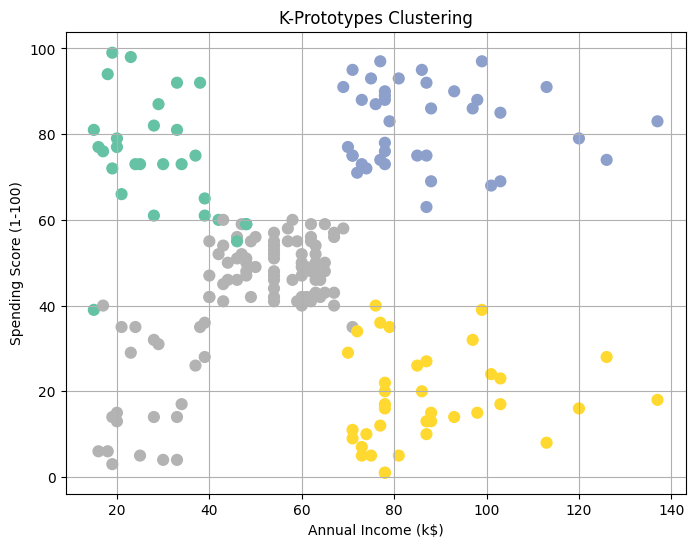

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['KPrototypes_Cluster'], cmap='Set2', s=60)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Prototypes Clustering")
plt.grid(True)
plt.show()

### K-Prototypes is ideal for real-world datasets with both numeric and categorical columns, such as customer demographics and behavior.